In [125]:
import pandas as pd
OB_df = pd.read_csv(r'C:\Users\dladaenielle\OneDrive - Cebu Pacific\Desktop\use this\Innovations & Systems\Overbooking\Template Files\OBdata_SYS_Nov15toDec31.csv')

OB_cost_df = pd.read_csv(r'C:\Users\dladaenielle\OneDrive - Cebu Pacific\Desktop\use this\Innovations & Systems\Overbooking\Template Files\OB Costs v1118.csv')
OB_cost_df.dropna(axis=0, how='any', inplace=True)

OB_df = OB_df.merge(OB_cost_df, on=['Market_leg','Airline'], how='left')

OB_df.dropna(axis=0, how='any', inplace=True)

OB_df

,Departure_date,Airline,Market_leg,Flight_number,Day_of_week,Capacity,Lid,NS_fc,SLFFC,Lid_adj,Max OB%,Empty Seat Cost,DB Cost
0,11/16/2025,5J,BCDMNL,474,Sun,180,184,0.009,1.011,0,9.0,3988.0,3599.0
1,11/17/2025,5J,BCDMNL,474,Mon,180,189,0.037,1.000,0,9.0,3988.0,3599.0
2,11/18/2025,5J,BCDMNL,474,Tue,180,188,0.043,0.967,0,9.0,3988.0,3599.0
3,11/19/2025,5J,BCDMNL,474,Wed,180,192,0.059,0.994,0,9.0,3988.0,3599.0
4,11/20/2025,5J,BCDMNL,474,Thu,180,192,0.066,0.961,0,9.0,3988.0,3599.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25082,12/15/2025,5J,TAGDVO,4747,Mon,230,243,0.024,0.670,0,9.0,4164.0,4399.0
25083,12/19/2025,5J,TAGDVO,4747,Fri,230,246,0.032,0.722,0,9.0,4164.0,4399.0
25084,12/22/2025,5J,TAGDVO,4747,Mon,230,236,0.010,0.457,0,9.0,4164.0,4399.0
25085,12/26/2025,5J,TAGDVO,4747,Fri,230,236,0.024,0.639,0,9.0,4164.0,4399.0


In [126]:
OB_df['OB%'] = (OB_df['Lid']/OB_df['Capacity']-1)*100

#Remove flights with OB% <0 or OB% >9
OB_df = OB_df[(OB_df['OB%'] > 0) & (OB_df['OB%'] < 9)]
#Remove flights with User Lid Adjustments
OB_df = OB_df[(OB_df['Lid_adj'] == 0)]

OB_df

,Departure_date,Airline,Market_leg,Flight_number,Day_of_week,Capacity,Lid,NS_fc,SLFFC,Lid_adj,Max OB%,Empty Seat Cost,DB Cost,OB%
0,11/16/2025,5J,BCDMNL,474,Sun,180,184,0.009,1.011,0,9.0,3988.0,3599.0,2.222222
1,11/17/2025,5J,BCDMNL,474,Mon,180,189,0.037,1.000,0,9.0,3988.0,3599.0,5.000000
2,11/18/2025,5J,BCDMNL,474,Tue,180,188,0.043,0.967,0,9.0,3988.0,3599.0,4.444444
3,11/19/2025,5J,BCDMNL,474,Wed,180,192,0.059,0.994,0,9.0,3988.0,3599.0,6.666667
4,11/20/2025,5J,BCDMNL,474,Thu,180,192,0.066,0.961,0,9.0,3988.0,3599.0,6.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25082,12/15/2025,5J,TAGDVO,4747,Mon,230,243,0.024,0.670,0,9.0,4164.0,4399.0,5.652174
25083,12/19/2025,5J,TAGDVO,4747,Fri,230,246,0.032,0.722,0,9.0,4164.0,4399.0,6.956522
25084,12/22/2025,5J,TAGDVO,4747,Mon,230,236,0.010,0.457,0,9.0,4164.0,4399.0,2.608696
25085,12/26/2025,5J,TAGDVO,4747,Fri,230,236,0.024,0.639,0,9.0,4164.0,4399.0,2.608696


In [127]:
#Check current aggregated OB% per leg

agg_cap = OB_df.groupby(['Market_leg','Airline'])['Capacity'].sum()
agg_lid = OB_df.groupby(['Market_leg','Airline'])['Lid'].sum()

curr_OB = (agg_lid/agg_cap)-1
print(curr_OB.round(2)*100)

curr_OB

Market_leg  Airline
BCDCEB      5J         3.0
            DG         4.0
BCDDVO      5J         5.0
BCDMNL      5J         6.0
BKKCRK      5J         4.0
                      ... 
ZAMCEB      5J         2.0
ZAMDVO      5J         3.0
ZAMILO      5J         4.0
ZAMMNL      5J         8.0
ZAMTWT      5J         5.0
Length: 192, dtype: float64


Market_leg  Airline
BCDCEB      5J         0.033231
            DG         0.037252
BCDDVO      5J         0.048261
BCDMNL      5J         0.057822
BKKCRK      5J         0.040861
                         ...   
ZAMCEB      5J         0.015942
ZAMDVO      5J         0.032989
ZAMILO      5J         0.044444
ZAMMNL      5J         0.077385
ZAMTWT      5J         0.055000
Length: 192, dtype: float64

In [128]:
OB_df_copy = OB_df.drop(columns=['Departure_date', 'Flight_number', 'Lid', 'Day_of_week','Max OB%', 'Lid_adj'])

OB_df_copy["OB%"]=OB_df_copy["OB%"].round(2)

OB_df_copy['DB Cost'] = pd.to_numeric(OB_df_copy['DB Cost'], errors='coerce')
OB_df_copy['cost_ratio'] = OB_df_copy['Empty Seat Cost']/OB_df_copy['DB Cost']

OB_df_copy = OB_df_copy.drop(columns=['Empty Seat Cost', 'DB Cost', 'Capacity'])

OB_df_copy.head()

,Airline,Market_leg,NS_fc,SLFFC,OB%,cost_ratio
0,5J,BCDMNL,0.009,1.011,2.22,1.108086
1,5J,BCDMNL,0.037,1.000,5.00,1.108086
2,5J,BCDMNL,0.043,0.967,4.44,1.108086
3,5J,BCDMNL,0.059,0.994,6.67,1.108086
4,5J,BCDMNL,0.066,0.961,6.67,1.108086


In [129]:
#verify that there are no object data type
categorical_cols = OB_df_copy.select_dtypes(include='object').columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Airline', 'Market_leg'], dtype='object')


In [130]:
# Convert Airline column to dummy variables, drop one category to avoid multicollinearity
OB_df_copy = pd.get_dummies(OB_df_copy, columns=['Airline'], drop_first=True)

# Assume your target column is 'y'
independent_var = OB_df_copy.drop('OB%', axis=1)
dependent_var = OB_df_copy['OB%']
OB_df_copy

,Market_leg,NS_fc,SLFFC,OB%,cost_ratio,Airline_DG
0,BCDMNL,0.009,1.011,2.22,1.108086,False
1,BCDMNL,0.037,1.000,5.00,1.108086,False
2,BCDMNL,0.043,0.967,4.44,1.108086,False
3,BCDMNL,0.059,0.994,6.67,1.108086,False
4,BCDMNL,0.066,0.961,6.67,1.108086,False
...,...,...,...,...,...,...
25082,TAGDVO,0.024,0.670,5.65,0.946579,False
25083,TAGDVO,0.032,0.722,6.96,0.946579,False
25084,TAGDVO,0.010,0.457,2.61,0.946579,False
25085,TAGDVO,0.024,0.639,2.61,0.946579,False


In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent_var, dependent_var, test_size=0.3, random_state=99)

leg = X_train["Market_leg"]
X_train.drop("Market_leg", axis=1, inplace=True)
X_test.drop("Market_leg", axis=1, inplace=True)

bool_cols = X_train.select_dtypes('bool').columns
X_train[bool_cols] = X_train[bool_cols].astype(int)

# Also do the same for X_test
X_test[bool_cols] = X_test[bool_cols].astype(int)

In [132]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
Xtrain_pred = model.predict(X_train)
y_pred = model.predict(X_test).round(2)
print(y_pred)

[7.91 5.24 5.5  ... 5.94 5.34 3.54]


In [133]:
from statsmodels.api import OLS, add_constant

sm_model = OLS(y_train, add_constant(X_train)).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OB%   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2875.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        14:42:28   Log-Likelihood:                -9127.9
No. Observations:                5847   AIC:                         1.827e+04
Df Residuals:                    5842   BIC:                         1.830e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3069      0.081     16.188      0.000       1.149       1.465
NS_fc         75.4362      0.963     78.313      0.000      73.548      77.325
SLFFC         -3.0788      0.109    -28.179      0.000      -3.293      -2.865
cost_ratio     2.9158      0.039     75.401      0.000       2.840       2.992
Airline_DG     0.5298      0.044     11.913      0.000       0.443       0.617
==============================================================================
Omnibus:                      345.368   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1314.430
Skew:                           0.167   Prob(JB):                    3.76e-286
Kurtosis:                       5.299   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

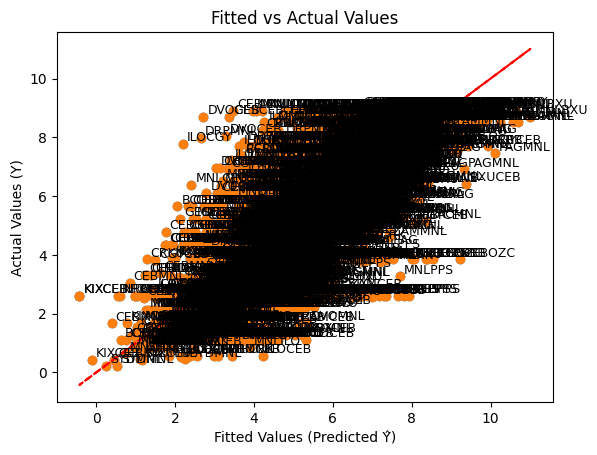

In [134]:
#Scatterplot of Fitted Y vs Actual Y

import matplotlib.pyplot as plt

plt.scatter(sm_model.fittedvalues, list(sm_model.model.endog))
labels = list(leg)

for i, label in enumerate(labels):
    plt.text(sm_model.fittedvalues.reset_index()[0][i] +0.1, sm_model.model.endog[i]+0.1, label, fontsize=9)

plt.scatter(sm_model.fittedvalues, sm_model.model.endog)
plt.plot(sm_model.fittedvalues, sm_model.fittedvalues, color='red', linestyle='--')  # 45° line
plt.xlabel("Fitted Values (Predicted Ŷ)")
plt.ylabel("Actual Values (Y)")
plt.title("Fitted vs Actual Values")
plt.show()

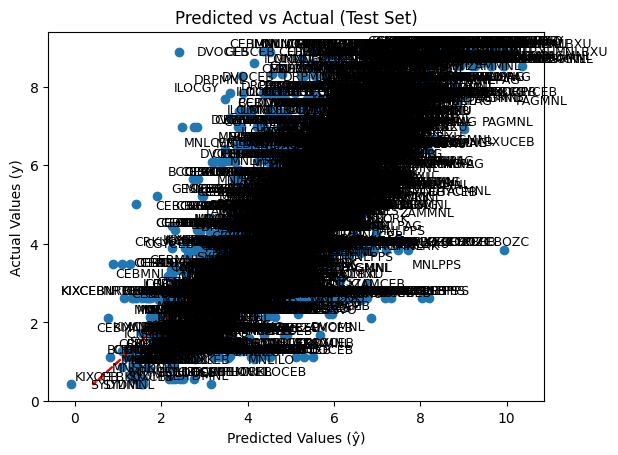

In [135]:
plt.scatter(sm_model.predict(add_constant(X_test)), y_test)

labels = list(leg)

for i, label in enumerate(labels):
    plt.text(sm_model.fittedvalues.reset_index()[0][i] +0.1, sm_model.model.endog[i]+0.1, label, fontsize=9)

plt.plot(y_test, y_test, color='red', linestyle='--')  # 45° perfect-fit line
plt.xlabel("Predicted Values (ŷ)")
plt.ylabel("Actual Values (y)")
plt.title("Predicted vs Actual (Test Set)")
plt.show()

In [136]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are defined
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R² score on training data:", r2_score(y_train, Xtrain_pred))
print("R² score on test data:", r2_score(y_test, y_pred))

Mean Squared Error: 1.3748133625847627
Mean Absolute Error: 0.8222457120063821
R² score on training data: 0.663100506284713
R² score on test data: 0.6510552709960744


In [137]:
print("Intercept:", model.intercept_)

for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

coef_dict = dict(zip(X_train.columns, model.coef_))

Intercept: 1.3069232326987397
NS_fc: 75.4362139134564
SLFFC: -3.078848724211545
cost_ratio: 2.9157881116774313
Airline_DG: 0.5298300362898911


In [138]:
#update the date part of the filename

OW_optimized_OB = pd.read_excel(
    r'C:\Users\dladaenielle\OneDrive - Cebu Pacific\Desktop\use this\Innovations & Systems\Overbooking\OW OB Model\2025-11-18_OB.xlsx',
    sheet_name='results'
)

OW_optimized_OB = OW_optimized_OB[['Airline Code', 'Leg', 'negative_binomial']]
OW_optimized_OB = OW_optimized_OB.rename(columns={'Airline Code': 'Airline'})
OW_optimized_OB = OW_optimized_OB.rename(columns={'Leg': 'Market_leg'})
OW_optimized_OB = OW_optimized_OB.rename(columns={'negative_binomial': 'OW_optimized_OB'})

OW_optimized_OB['OW_optimized_OB'] = (OW_optimized_OB['OW_optimized_OB']-1)*100

OW_optimized_OB['Market_leg'] = (
    OW_optimized_OB['Market_leg'].str[:3] +
    OW_optimized_OB['Market_leg'].str[-3:]
)

#OW_optimized_OB['Market_leg'] = OW_optimized_OB['Airline'].astype(str) + ' ' + OW_optimized_OB['Market_leg'].astype(str)

#OW_optimized_OB.drop(columns="Airline")

OW_optimized_OB

,Airline,Market_leg,OW_optimized_OB
0,5J,BCDCEB,1.4
1,5J,CEBBCD,1.5
2,5J,BXUCEB,2.6
3,5J,CEBBXU,2.4
4,5J,CEBCGY,2.5
...,...,...,...
242,T6,MPHENI,8.6
243,T6,TAGENI,9.0
244,T6,USUENI,3.1
245,T6,ENIMNL,9.0


In [139]:
b0 = model.intercept_

Y_target = {
    (m, a): y
    for m, a, y in zip(
        OW_optimized_OB['Market_leg'],
        OW_optimized_OB['Airline'],
        OW_optimized_OB['OW_optimized_OB']
    )
}

result_list = []

for i in range(len(OB_df_copy)):
    market = OB_df_copy["Market_leg"].iloc[i]
    airline = OB_df_copy["Airline_DG"].iloc[i]
    Y = Y_target.get((market, airline), 5)   # default to 5 if market not in OW file
    Noshow_fc = OB_df_copy["NS_fc"].iloc[i]
    SLFFC = OB_df_copy["SLFFC"].iloc[i]
    cost_ratio = OB_df["Empty Seat Cost"].iloc[i] / OB_df["DB Cost"].iloc[i]

    COES = (Y - b0
              - coef_dict['NS_fc'] * Noshow_fc
              - coef_dict['SLFFC'] * SLFFC
              - coef_dict['Airline_DG'] * airline
           ) / coef_dict['cost_ratio']

    print(f"Market: {market},Airline: {airline}, Y: {Y}, COES: {COES}")
    result_list.append(COES)

OB_df["reco_cost_ratio"] = result_list
OB_df.to_csv("results.csv")

Market: BCDMNL,Airline: False, Y: 5, COES: 2.101273023825206
Market: BCDMNL,Airline: False, Y: 5, COES: 1.365252008804166
Market: BCDMNL,Airline: False, Y: 5, COES: 1.1751767117823664
Market: BCDMNL,Airline: False, Y: 5, COES: 0.7897404372599878
Market: BCDMNL,Airline: False, Y: 5, COES: 0.5737935024427868
Market: BCDMNL,Airline: False, Y: 5, COES: 1.0653546205554165
Market: BCDMNL,Airline: False, Y: 5, COES: 0.9935548652620189
Market: BCDMNL,Airline: False, Y: 5, COES: 2.0342203757350714
Market: BCDMNL,Airline: False, Y: 5, COES: 1.331459430008503
Market: BCDMNL,Airline: False, Y: 5, COES: 1.1387428086908955
Market: BCDMNL,Airline: False, Y: 5, COES: 0.9798187661689506
Market: BCDMNL,Airline: False, Y: 5, COES: 0.5516160803969204
Market: BKKMNL,Airline: False, Y: 5, COES: 1.04793946514863
Market: BKKMNL,Airline: False, Y: 5, COES: 1.5104672392175136
Market: BKKMNL,Airline: False, Y: 5, COES: 1.4597829188547644
Market: BKKMNL,Airline: False, Y: 5, COES: 0.9222936832441385
Market: BKKMN

In [140]:
ave_reco_cost_ratio = (OB_df.groupby(['Market_leg', 'Airline'])['reco_cost_ratio'].mean())
db_cost = (OB_df.groupby(['Market_leg', 'Airline'])['DB Cost'].mean())
es_cost = (OB_df.groupby(['Market_leg', 'Airline'])['Empty Seat Cost'].mean())
db_cost_and_ratio = pd.DataFrame({'reco_ratio': ave_reco_cost_ratio, 'db_cost': db_cost, 'es_cost': es_cost})
db_cost_and_ratio["reco_coes"]= (db_cost_and_ratio['reco_ratio'] * db_cost_and_ratio['db_cost']).round(0)
db_cost_and_ratio = db_cost_and_ratio.merge(OW_optimized_OB, on=['Market_leg', 'Airline'],how='left')
db_cost_and_ratio

,Market_leg,Airline,reco_ratio,db_cost,es_cost,reco_coes,OW_optimized_OB
0,BCDCEB,5J,1.221422,3399.0,1145.0,4152.0,1.4
1,BCDCEB,DG,1.231330,3399.0,2554.0,4185.0,3.1
2,BCDDVO,5J,1.275880,3499.0,2931.0,4464.0,4.1
3,BCDMNL,5J,1.068257,3599.0,3988.0,3845.0,4.3
4,BKKCRK,5J,1.060283,8899.0,7313.0,9435.0,5.4
...,...,...,...,...,...,...,...
187,ZAMCEB,5J,0.487391,3299.0,609.0,1608.0,3.2
188,ZAMDVO,5J,1.125887,3699.0,1981.0,4165.0,3.9
189,ZAMILO,5J,1.371169,3899.0,4978.0,5346.0,3.5
190,ZAMMNL,5J,1.147727,4499.0,10911.0,5164.0,8.6


In [141]:
db_cost_and_ratio.to_csv("route_coes.csv")